In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Loading Data

In [3]:
data = pd.read_csv("multiple_linear_regression.csv")

In [4]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Preprocessing

In [6]:
data = data.dropna()
data.shape

(200, 4)

## Splitting Data

In [7]:
output_col = "Target"

In [8]:
# input
x = data.iloc[:, data.columns != output_col]

In [9]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [10]:
# output
y = data.loc[:, output_col]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=43)

In [12]:
data.shape

(200, 4)

In [13]:
x_train.shape

(140, 3)

In [14]:
x_test.shape

(60, 3)

In [15]:
y_train.shape

(140,)

In [16]:
y_test.shape

(60,)

## <font color = "green">Multiple Linear Regression </font>

``Training``

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

coef_ gives you an array of weights estimated by linear regression. It is of shape (n_targets, n_features).

In [18]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

The lr.intercept_ attribute in Python is used to get the intercept of the fitted linear regression model

In [19]:
lr.intercept_

3.0777744955280433

## Prediction

In [20]:
pred_value = lr.predict(x_test)

## Cost

In [21]:
from sklearn.metrics import mean_squared_error
cost = mean_squared_error(y_test, pred_value)
cost

2.241286253093347

2.241286253093347 means the predicted value has a ± value of 2.241286253093347 in each value

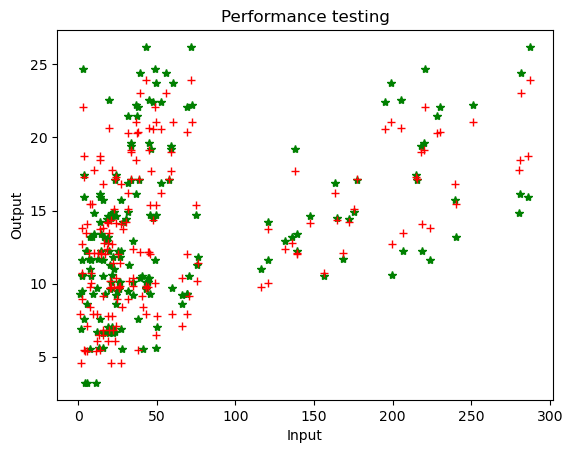

In [22]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, pred_value, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Assumptions of Linear Regression

## ``Homoscedasticity``

In [23]:
pred_value

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [25]:
y_test.head()

56     5.5
37    14.7
67    13.4
79    11.0
80    11.8
Name: Target, dtype: float64

`` residuals = errors``

In [26]:
residuals = y_test - pred_value

In [28]:
residuals.head(10)
# index value with error in that index value

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
Name: Target, dtype: float64

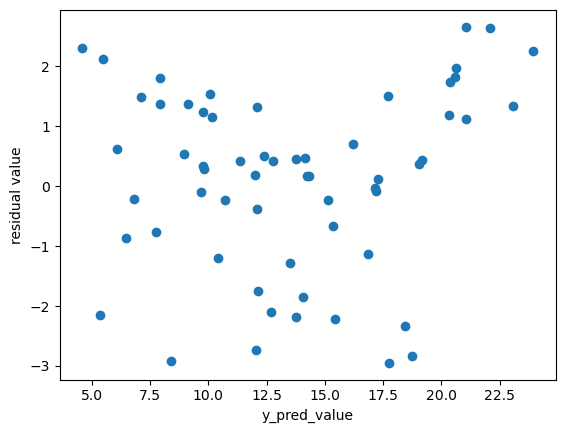

In [29]:
plt.scatter(pred_value, residuals)
plt.xlabel("y_pred_value")
plt.ylabel("residual value")
plt.show()

`` Above graph show no relation in values therefore the values are correctly trained.``

## Normality of Residuals

In [30]:
# seaborn used to get more enhanced visalizations
import seaborn as sns

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14440\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)
c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Target', ylabel='Density'>

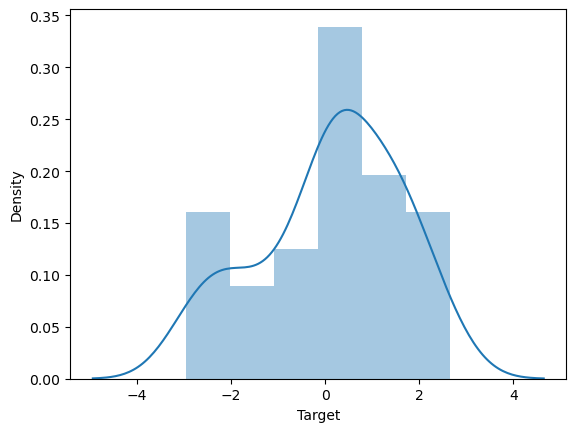

In [31]:
sns.distplot(residuals)

`` Graph is near to mean value = 0, there the values are normally distributed.``

## <font color="green">Ordinary Least Square (OLS) Method</font>

In [32]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
import statsmodels.api as sm
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [34]:
model = sm.OLS(y_train, x_with_constant)

In [35]:
result = model.fit()

In [36]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [37]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [38]:
lr.intercept_

3.0777744955280433

Above we can see that ``result.param`` and ``lr.coef_ , lr.intercept `` has same values.

In [39]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           1.67e-63
Time:                        17:55:41   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

getting ``Feature3`` p > 0.05, therefore remove the value because its accepting null hypothesis.